# 如何加载HDR高光谱文件

In [18]:
import spectral.io.envi as envi
import matplotlib.pyplot as plt
from spectral import *
import numpy as np
import scipy.io
from PIL import Image
import os
print(os.getcwd())

cur_path =   'D:\DataSets\hyperspectraldatasets\lowlight_hyperspectral_datasets\captured_1_8\\2021-01-08_13-18-38_123_orange2_zao_1ms\capture\\2021-01-08_13-18-38_123_orange2.hdr'

print(file_name)
img = envi.open(cur_path)
print(img)

print(img.shape) #(390, 512, 448)
print(type(img)) #<class 'spectral.io.bilfile.BilFile'>

#scipy.io.savemat('lowlight.mat', {'lowlight':array})
#print(img[:,:,])

D:\DataSets\hyperspectraldatasets\lowlight_hyperspectral_datasets\data_preprocess
D:\DataSets\hyperspectraldatasets\lowlight_hyperspectral_datasets\captured_1_8\2021-01-08_13-18-38_123_orange2_zao_1ms\capture\2021-01-08_13-21-14_123_orange2.hdr
	Data Source:   'D:\DataSets\hyperspectraldatasets\lowlight_hyperspectral_datasets\captured_1_8\2021-01-08_13-18-38_123_orange2_zao_1ms\capture\2021-01-08_13-18-38_123_orange2.raw'
	# Rows:            390
	# Samples:         512
	# Bands:           448
	Interleave:        BIL
	Quantization:  16 bits
	Data format:    uint16
(390, 512, 448)
<class 'spectral.io.bilfile.BilFile'>


# class ImageArray(data, spyfile)
ImageArray is an interface to an image loaded entirely into memory. ImageArray objects are returned by spectral.SpyFile.load. This class inherits from both numpy.ndarray and Image, providing the interfaces of both classes.
- ImageArray是numpy.ndarray类型的子类

In [28]:
array = img.load()
print(type(array)) #<class 'spectral.image.ImageArray'> 
print('array.shape', array.shape) #array.shape (390, 512, 448)
print(isinstance(array, np.ndarray)) #True,返回True，说明array是numpy.ndarray类型


<class 'spectral.image.ImageArray'>
array.shape (390, 512, 448)
True


# 以伪彩色方式显示一个通道的数据

(390, 512, 1)
float32


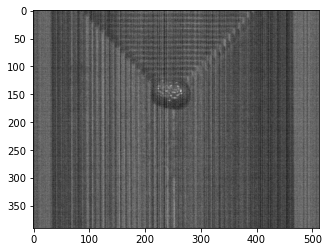

In [79]:
band_150 = array[:,:,150]
print(band_150.shape)
band_150_squeezed = band_150.squeeze()
print(band_150_squeezed.dtype)
plt.imshow(band_150_squeezed, 'gray')

# 将高光谱数据保存为Mat文件

使用模块scipy.io的函数loadmat和savemat可以实现Python对mat数据的读写

In [106]:
#spectral_slice = array[(390//2 - 32):(390//2 + 32), (512//2 - 32):(512//2 + 32), 0:30]
spectral_slice = array[100:200, 200:300, 135:165]
print(spectral_slice.shape)
spectral_int16 = spectral_slice.astype(np.int16) #这里把它转换为np.int16类型是为了让其适应算法的输入
scipy.io.savemat('lowlight_1ms.mat', {'img':spectral_slice})

(100, 100, 30)


# 读取Mat文件中的数据
 - 使用loadmat读取出来的数据的类型是字典类型
 - 根据key从字典里取出的类型是numpy.ndarray

In [107]:
mat_data = scipy.io.loadmat('lowlight_1ms.mat')
print(type(mat_data)) #<class 'dict'>
mat_data_content = mat_data['img']
print(type(mat_data_content)) #<class 'numpy.ndarray'>
print(mat_data_content.shape)

<class 'dict'>
<class 'numpy.ndarray'>
(100, 100, 30)


# 以伪彩色的方式显示高光谱图像
- 选择9，19，29三个通道作为形成伪彩色
- 因为原始的高光谱是12bit的数据，所以如果直接显示的话，会出现错误，显示不出来。log提示如下：Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

In [108]:
color_mat = mat_data_content[:,:,(9, 19, 29)]
print(color_mat.shape)
print(color_mat.dtype)
#plt.imshow(color_mat) 

(100, 100, 3)
float32


- 所以需要将数据归一化到[0..1] for floats or [0..255] for integers之间
- 这里先看归一化到[0..1]之间

gt max =  245.0
gt min = 138.0
float32
float32
gt max =  1.0
gt min = 0.0


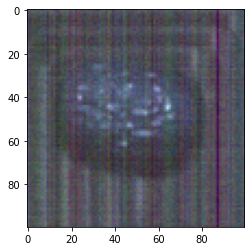

In [109]:
print("gt max = ", color_mat.max())
print('gt min =', color_mat.min())
color_min = color_mat.min()
color_max = color_mat.max()
print(color_mat.dtype)

gt8bit = ( (color_mat - color_min)/ (color_max - color_min))
print(gt8bit.dtype)
print("gt max = ", gt8bit.max())
print('gt min =', gt8bit.min())
#print(gt8bit[:,:,0])
plt.imshow(gt8bit)

- 归一化到[0..255]之间

126
[[ 90  95 100 ...  88  88  90]
 [ 83  90  95 ...  88  85  95]
 [ 78  76  73 ...  81  85  81]
 ...
 [ 90  76  69 ...  66  88  88]
 [ 90  83  85 ...  97  81  83]
 [ 85  88  66 ...  78  71  85]]
255


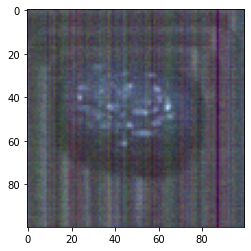

In [110]:
gt8bit_float = ((color_mat - color_min)/ (color_max - color_min))*255
gt8bit_int = gt8bit_float.astype(np.int8)
print(gt8bit_int.max())
print(gt8bit_int[:,:,1])
#plt.imshow(gt8bit_int)

gt16bit_int = gt8bit_float.astype(np.int16)
print(gt16bit_int.max())
plt.imshow(gt16bit_int)